In [11]:
import numpy as np
import matplotlib
import pandas as pd

dataset = pd.read_csv('/Users/wzhang/Downloads/lake_erie_habs_W4_6_8_9_12_13_16_2013-2020.xlsx - HAB_data (1).csv')

labels = dataset.iloc[:,16:].values

vals = pd.DataFrame(dataset.iloc[:,4:15].values)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(vals,labels,test_size=0.2,random_state=0)
X_train = np.array(X_train)


In [14]:
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Initialize MLP model
def create_mlp():
    mlp_model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1)  # Output layer for regression task
    ])

    # Compile the model
    mlp_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), loss='mae')

    # Print model summary
    mlp_model.summary()

    # Train the model
    history = mlp_model.fit(X_train, Y_train, epochs=300, batch_size=32, validation_split=0.2)

    # Evaluate model performance
    Y_pred = mlp_model.predict(X_test)
    return mlp_model


In [13]:
def create_rf():
    # Initialize Random Forest regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Train the model
    rf_model.fit(X_train, Y_train)
    return rf_model


In [ ]:
from tensorflow.keras.layers import concatenate

2024-06-27 15:34:15.367211: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
rf = create_rf()
mlp = create_mlp()
mlpPredict = mlp.predict(X_train)
rfPredict = rf.predict(X_train)
mlpPredict.resize(671,1)
rfPredict.resize(671,1)
trainData = concatenate([mlpPredict, rfPredict])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 46.9236 - val_loss: 25.7596
Epoch 2/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.6930 - val_loss: 21.4956
Epoch 3/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1097 - val_loss: 20.3543
Epoch 4/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.6777 - val_loss: 19.3864
Epoch 5/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.7753 - val_loss: 18.2344
Epoch 6/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17.3328 - val_loss: 17.3354
Epoch 7/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.1608 - val_loss: 16.3448
Epoch 8/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.8016 - val_loss: 14.8836
Epoch 9/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 14.2039 - val_loss: 14.9021
Epoch 10/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15.3406 - val_loss: 14.2501
Epoch 11/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.1840 - val_loss: 14.0678
Epoch 12/300
17/17 ━━━━━━━━━━━━━━━━━━━━ 

In [10]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
regressor.fit(trainData, Y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


GradientBoostingRegressor(learning_rate=1.0, max_depth=1, random_state=0)

In [36]:
mlpPredictTest = mlp.predict(X_test)
rfPredictTest = rf.predict(X_test)
rfPredictTest.resize(168,1)
testData = concatenate([mlpPredictTest,rfPredictTest])
print(testData)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
tf.Tensor(
[[ 6.45986462e+00  4.68060017e+00]
 [ 9.30590271e+02  3.90060699e+02]
 [ 2.65341520e+00  6.85659981e+00]
 [ 3.87210960e+01  5.15993996e+01]
 [ 8.52903461e+00  8.21889973e+00]
 [ 7.24625397e+01  8.74632034e+01]
 [ 1.68250523e+01  2.96245995e+01]
 [ 6.80590668e+01  5.94417992e+01]
 [ 5.52863550e+00  1.23114004e+01]
 [ 5.41074944e+00  7.58599997e+00]
 [ 4.00695763e+01  4.50588989e+01]
 [ 1.18901031e+02  1.50219406e+02]
 [ 7.35226154e-01  3.30480003e+00]
 [ 8.95950413e+00  1.53299999e+01]
 [ 4.19142532e+00  5.94189978e+00]
 [ 8.15768147e+00  1.04138002e+01]
 [ 3.30365610e+00  3.48350000e+00]
 [ 1.63850451e+00  3.62089992e+00]
 [ 5.42225027e+00  8.11540031e+00]
 [ 6.18958054e+01  8.35129013e+01]
 [ 3.28333626e+01  3.95985985e+01]
 [ 1.64313173e+00  2.74219990e+00]
 [ 6.37870598e+00  9.38809967e+00]
 [ 1.23116159e+00  3.40709996e+00]
 [ 1.24588022e+01  1.52896996e+01]
 [ 6.61133909e+00  8.86800003e+00]
 [ 1.36305628e+01  3.10678997e+01]
 [ 6.4

In [38]:
res = regressor.predict(testData)

In [39]:
from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)

0.8025007694638473


In [40]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)

9.012799661416322


In [41]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)

0.6363985841586571


In [24]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test,res,squared=False)
print(rmse)

27.17950528553889


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
import shap

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
print(testData.numpy())
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(testData.numpy())



[[ 6.45986462e+00  4.68060017e+00]
 [ 9.30590271e+02  3.90060699e+02]
 [ 2.65341520e+00  6.85659981e+00]
 [ 3.87210960e+01  5.15993996e+01]
 [ 8.52903461e+00  8.21889973e+00]
 [ 7.24625397e+01  8.74632034e+01]
 [ 1.68250523e+01  2.96245995e+01]
 [ 6.80590668e+01  5.94417992e+01]
 [ 5.52863550e+00  1.23114004e+01]
 [ 5.41074944e+00  7.58599997e+00]
 [ 4.00695763e+01  4.50588989e+01]
 [ 1.18901031e+02  1.50219406e+02]
 [ 7.35226154e-01  3.30480003e+00]
 [ 8.95950413e+00  1.53299999e+01]
 [ 4.19142532e+00  5.94189978e+00]
 [ 8.15768147e+00  1.04138002e+01]
 [ 3.30365610e+00  3.48350000e+00]
 [ 1.63850451e+00  3.62089992e+00]
 [ 5.42225027e+00  8.11540031e+00]
 [ 6.18958054e+01  8.35129013e+01]
 [ 3.28333626e+01  3.95985985e+01]
 [ 1.64313173e+00  2.74219990e+00]
 [ 6.37870598e+00  9.38809967e+00]
 [ 1.23116159e+00  3.40709996e+00]
 [ 1.24588022e+01  1.52896996e+01]
 [ 6.61133909e+00  8.86800003e+00]
 [ 1.36305628e+01  3.10678997e+01]
 [ 6.44641638e+00  9.86719990e+00]
 [ 1.40093887e+02  8

TypeError: The shap_values argument must be an Explanation object, Cohorts object, or dictionary of Explanation objects!

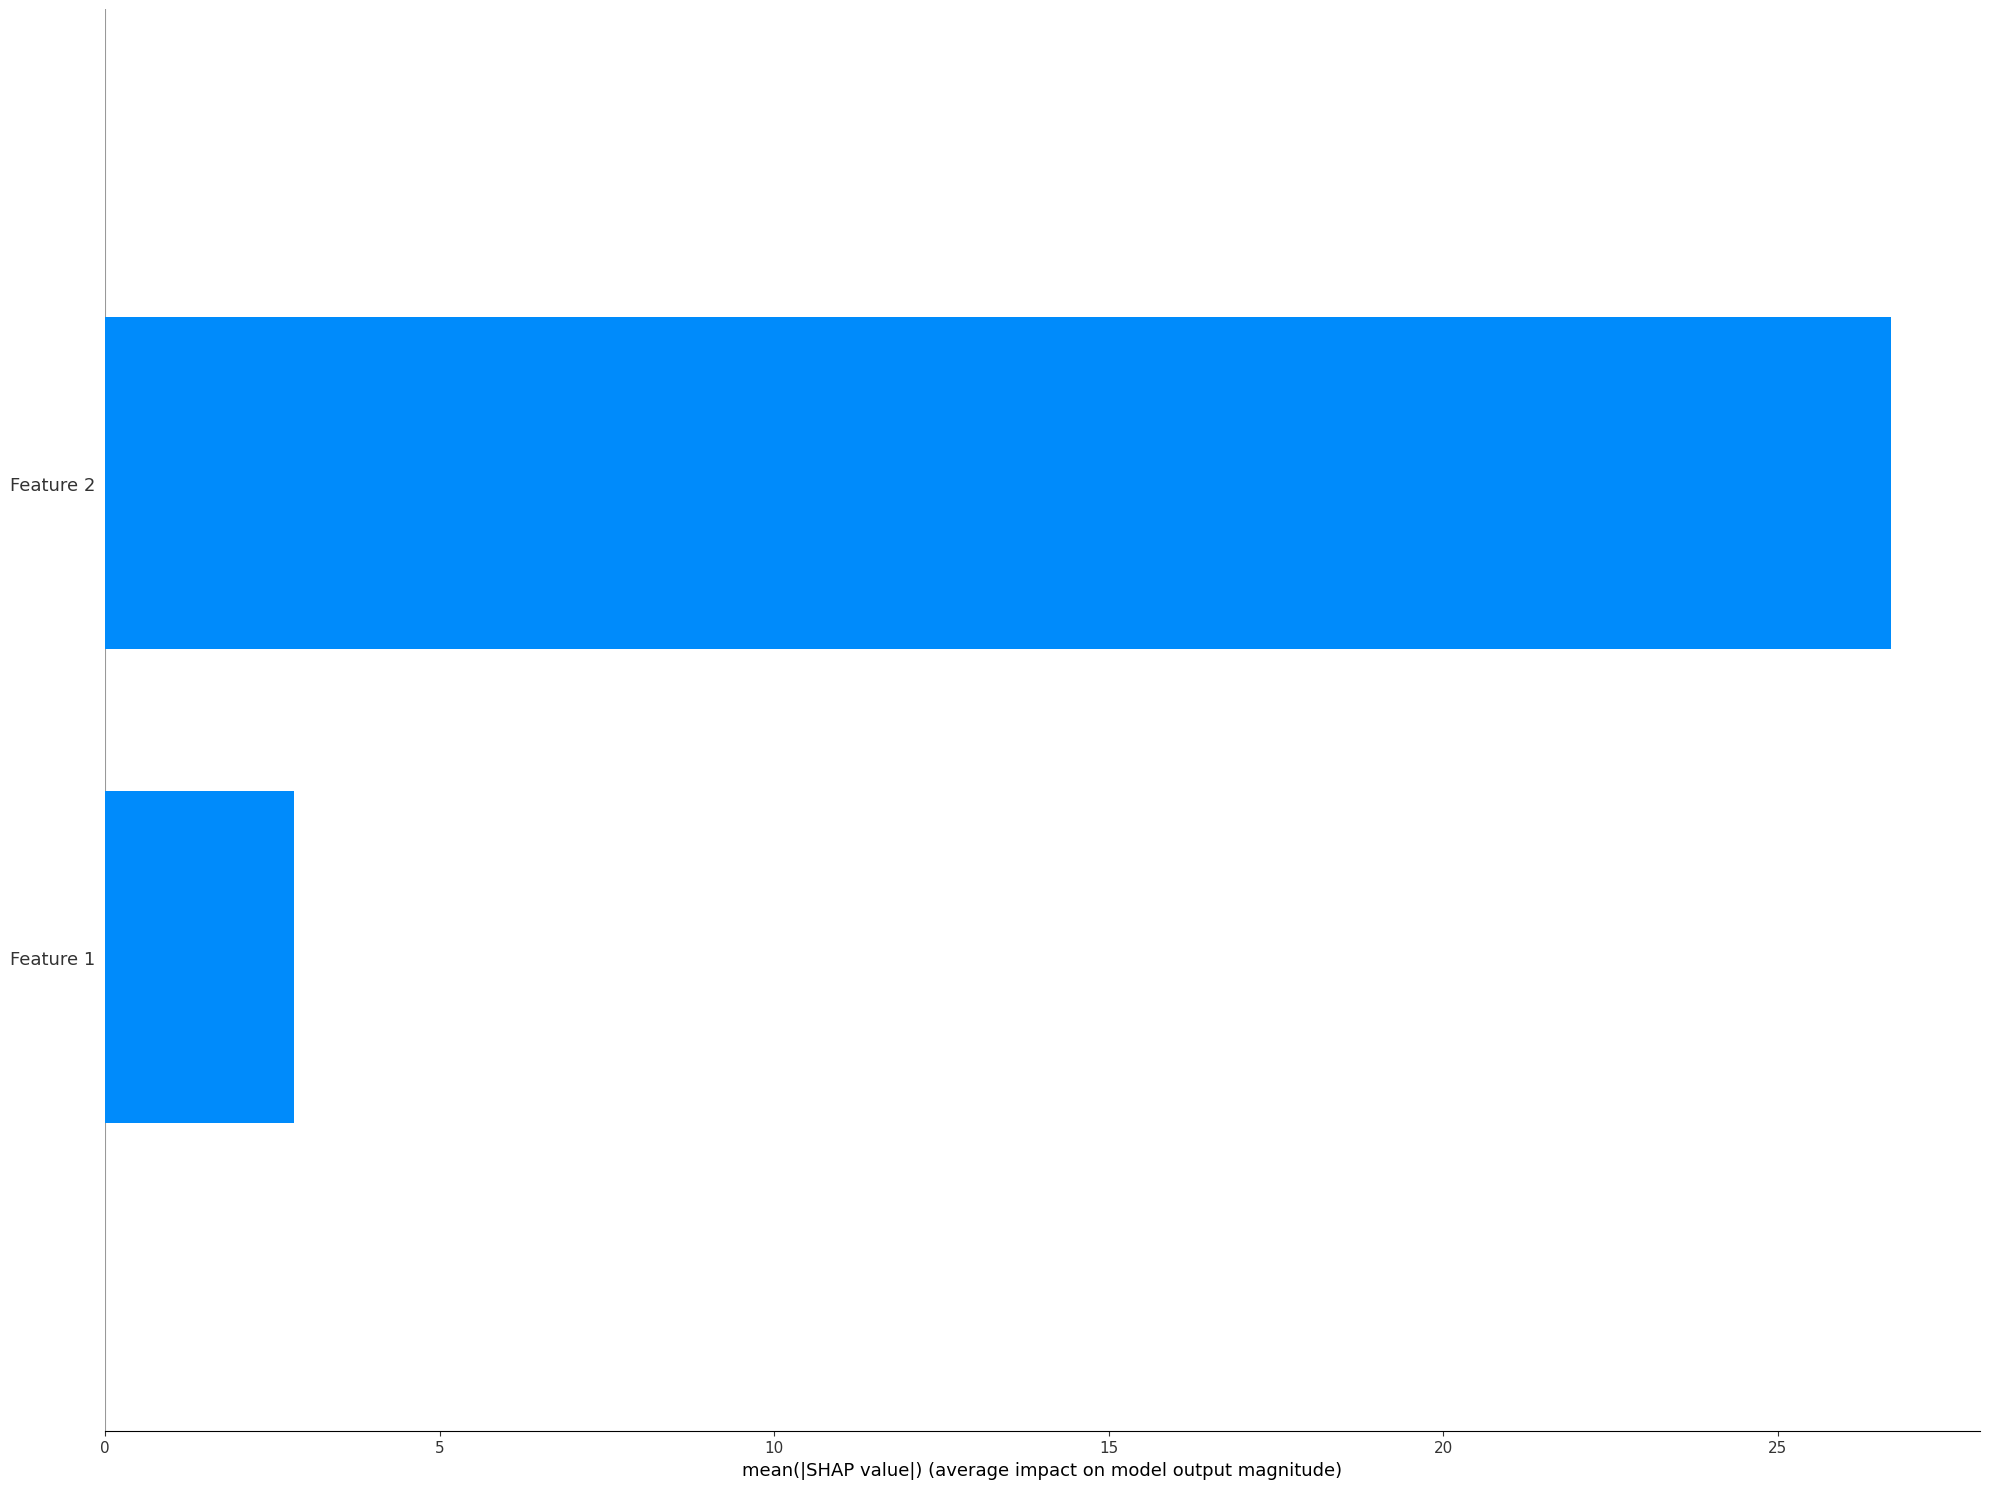

In [47]:
features = ["Feature 1", "Feature 2"]
shap.summary_plot(shap_values, testData,feature_names = features,plot_type="bar",plot_size=(20,15),show=False)